In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

# 1.Load the data set

In [34]:
df1 = pd.read_csv("parkinsons.data")

In [35]:
df1.to_csv('parkinsons.csv')

# 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the data set

In [36]:
df1.head() # top five record
# Status is a target variable. 1-Parkinson's disease and 0-Healthy

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [41]:
df1.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [37]:
df1.info() # variable types and no of records


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [38]:
df1.shape # Records and columns

(195, 24)

In [39]:
df1.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [42]:
df1.isnull().sum() # No missing values

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# 3.Using uni-variate & bi-variate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc

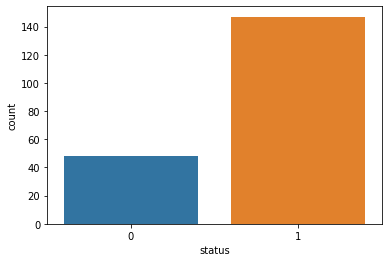

In [43]:
sns.countplot('status',data=df1)
#  147 people has disease  out of 195 so model might be biased due to this.

In [44]:
df1['status'].value_counts() # 147 has disease and 48 people are healthy

1    147
0     48
Name: status, dtype: int64

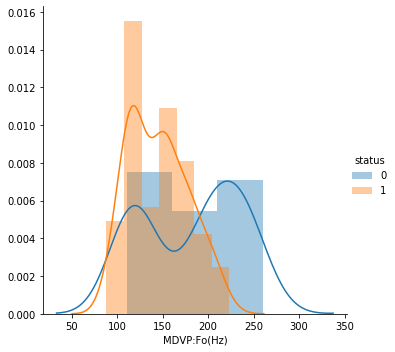

In [46]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'MDVP:Fo(Hz)').add_legend() # more  persons with disease has low MDVP:Fo(Hz)

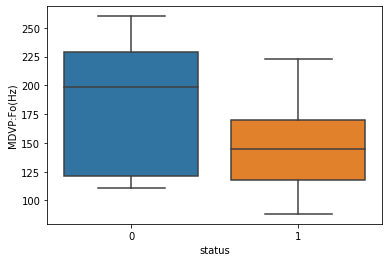

In [47]:
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=df1) # People with Higher MDVP:Fo(Hz)  are healthy and with low  have disease 

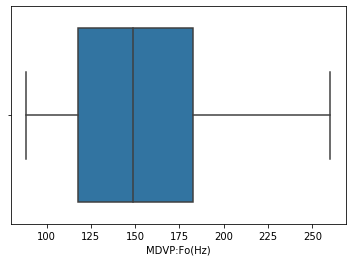

In [48]:
sns.boxplot('MDVP:Fo(Hz)',data=df1) # no outliers,max distribution between  117 to 182, meadian 149,right skewed

In [49]:
df1['MDVP:Fo(Hz)'].describe() # mean is more than median so its right skewed

count    195.000000
mean     154.228641
std       41.390065
min       88.333000
25%      117.572000
50%      148.790000
75%      182.769000
max      260.105000
Name: MDVP:Fo(Hz), dtype: float64

In [52]:
df1[['MDVP:Fo(Hz)','status']].corr() # not highly correlated with status

,MDVP:Fo(Hz),status
MDVP:Fo(Hz),1.000000,-0.383535
status,-0.383535,1.000000


C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


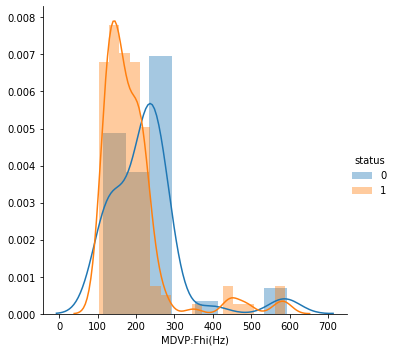

In [53]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'MDVP:Fhi(Hz)').add_legend() # more  persons with disease has low MDVP:Fhi(Hz)

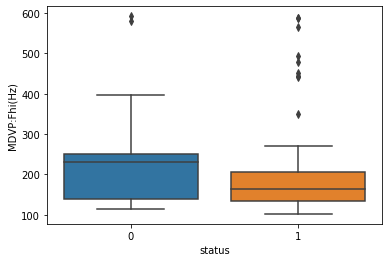

In [57]:
sns.boxplot(x='status',y='MDVP:Fhi(Hz)',data=df1) # People with Higher MDVP:Fhi(Hz)  are healthy and with low  have disease 

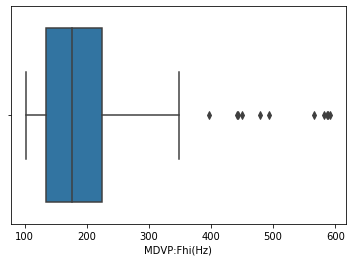

In [54]:
sns.boxplot('MDVP:Fhi(Hz)',data=df1) # has outliers,max distribution between  135 to 224, meadian 176,right skewed

In [55]:
df1['MDVP:Fhi(Hz)'].describe() # mean is more than median so its right skewed

count    195.000000
mean     197.104918
std       91.491548
min      102.145000
25%      134.862500
50%      175.829000
75%      224.205500
max      592.030000
Name: MDVP:Fhi(Hz), dtype: float64

In [56]:
df1[['MDVP:Fhi(Hz)','status']].corr() # not highly correlated with status

,MDVP:Fhi(Hz),status
MDVP:Fhi(Hz),1.000000,-0.166136
status,-0.166136,1.000000


C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


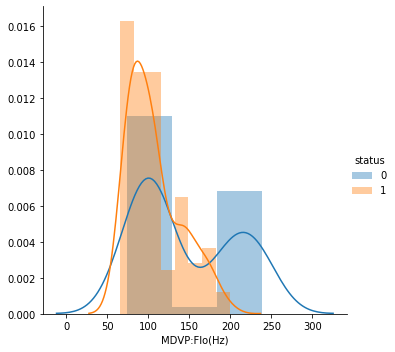

In [58]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'MDVP:Flo(Hz)').add_legend() # more  persons with disease has low MDVP:Flo(Hz)

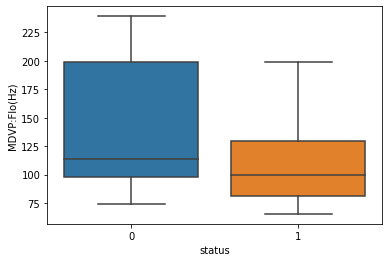

In [59]:
sns.boxplot(x='status',y='MDVP:Flo(Hz)',data=df1) # People with Higher MDVP:Flo(Hz)  are healthy and with low  have disease 

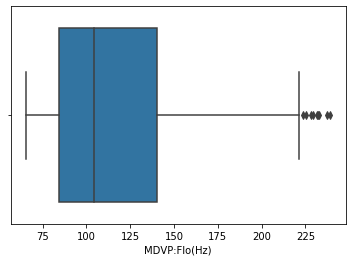

In [60]:
sns.boxplot('MDVP:Flo(Hz)',data=df1) # has outliers,max distribution between  84 to 140, meadian 104,right skewed

In [61]:
df1['MDVP:Flo(Hz)'].describe() # mean is more than median so its right skewed

count    195.000000
mean     116.324631
std       43.521413
min       65.476000
25%       84.291000
50%      104.315000
75%      140.018500
max      239.170000
Name: MDVP:Flo(Hz), dtype: float64

In [62]:
df1[['MDVP:Flo(Hz)','status']].corr() # not highly correlated with status

,MDVP:Flo(Hz),status
MDVP:Flo(Hz),1.0000,-0.3802
status,-0.3802,1.0000


C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


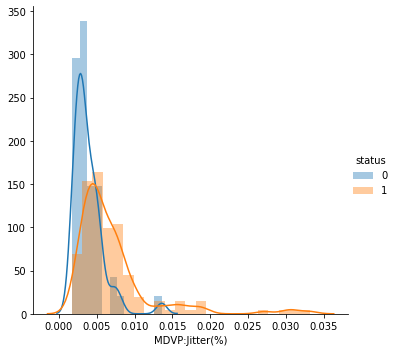

In [67]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'MDVP:Jitter(%)').add_legend() # more  persons with disease has higher MDVP:Jitter(%)

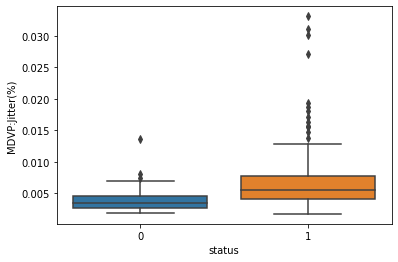

In [66]:
sns.boxplot(x='status',y='MDVP:Jitter(%)',data=df1) # People with lower MDVP:Jitter(%)  are healthy and with hiher  have disease

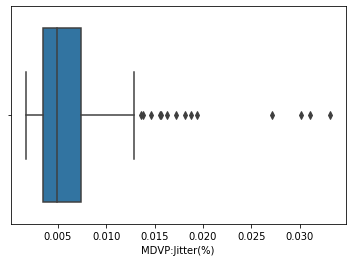

In [65]:
sns.boxplot('MDVP:Jitter(%)',data=df1) # has outliers,max distribution between  .003 to .007, meadian .005,right skewed

In [64]:
df1['MDVP:Jitter(%)'].describe() # mean is more than median so its right skewed

count    195.000000
mean       0.006220
std        0.004848
min        0.001680
25%        0.003460
50%        0.004940
75%        0.007365
max        0.033160
Name: MDVP:Jitter(%), dtype: float64

In [63]:
df1[['MDVP:Jitter(%)','status']].corr() # not highly correlated with status

,MDVP:Jitter(%),status
MDVP:Jitter(%),1.00000,0.27822
status,0.27822,1.00000


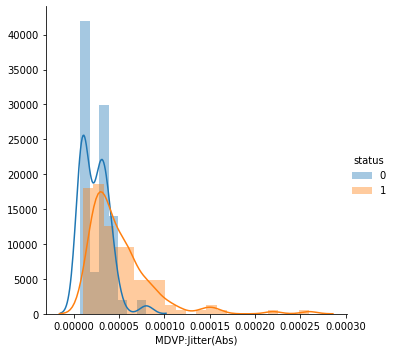

In [68]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'MDVP:Jitter(Abs)').add_legend() # more  persons with disease has higher MDVP:Jitter(Abs)

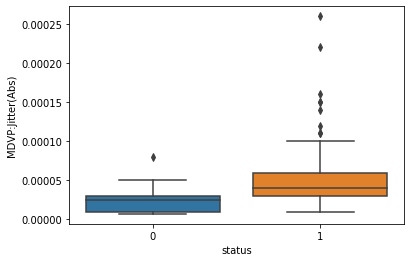

In [70]:
sns.boxplot(x='status',y='MDVP:Jitter(Abs)',data=df1) # People with lower MDVP:Jitter(Abs) are healthy and with hiher  have disease

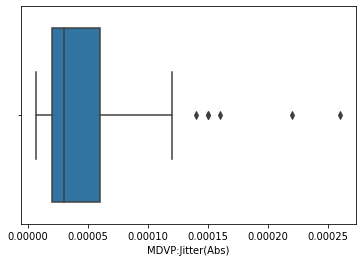

In [71]:
sns.boxplot('MDVP:Jitter(Abs)',data=df1) # has outliers,max distribution between  0.000020 to 0.000060, meadian 0.000030,right skewed

In [72]:
df1['MDVP:Jitter(Abs)'].describe() # mean is more than median so its right skewed

count    195.000000
mean       0.000044
std        0.000035
min        0.000007
25%        0.000020
50%        0.000030
75%        0.000060
max        0.000260
Name: MDVP:Jitter(Abs), dtype: float64

In [73]:
df1[['MDVP:Jitter(Abs)','status']].corr() # not highly correlated with status

,MDVP:Jitter(Abs),status
MDVP:Jitter(Abs),1.000000,0.338653
status,0.338653,1.000000


C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


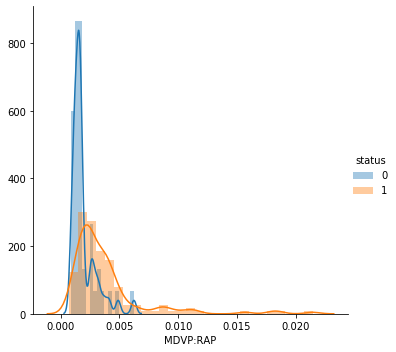

In [77]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'MDVP:RAP').add_legend() # more  persons with disease has higher MDVP:RAP

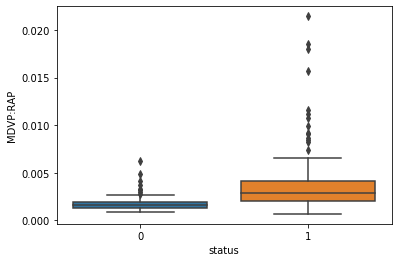

In [79]:
sns.boxplot(x='status',y='MDVP:RAP',data=df1) # People with lower MDVP:RAP are healthy and with hiher  have disease

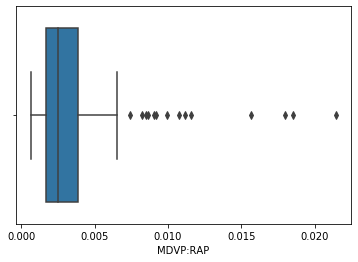

In [76]:
sns.boxplot('MDVP:RAP',data=df1) # has outliers,max distribution between 0.001660 to 0.003835, meadian 0.002500,right skewed

In [75]:
df1['MDVP:RAP'].describe() # mean is more than median so its right skewed

count    195.000000
mean       0.003306
std        0.002968
min        0.000680
25%        0.001660
50%        0.002500
75%        0.003835
max        0.021440
Name: MDVP:RAP, dtype: float64

In [74]:
df1[['MDVP:RAP','status']].corr() # not highly correlated with status

,MDVP:RAP,status
MDVP:RAP,1.000000,0.266668
status,0.266668,1.000000


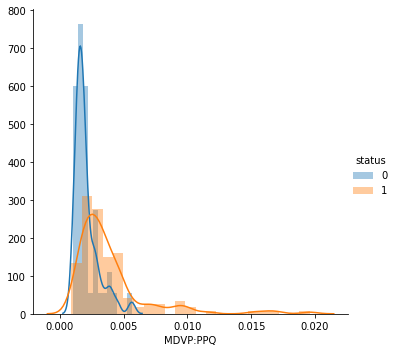

In [85]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'MDVP:PPQ').add_legend() # more  persons with disease has higher MDVP:PPQ 

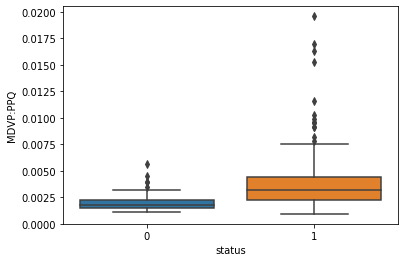

In [83]:
sns.boxplot(x='status',y='MDVP:PPQ',data=df1) # People with lower MDVP:PPQ are healthy and with hiher  have disease

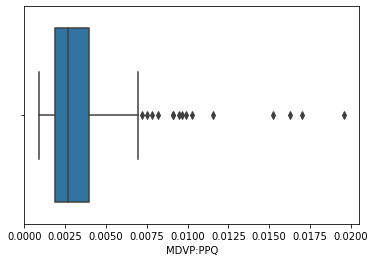

In [82]:
sns.boxplot('MDVP:PPQ',data=df1) # has outliers,max distribution between 0.001860 to 0.003955, meadian 0.002690,right skewed

In [81]:
df1['MDVP:PPQ'].describe() # mean is more than median so its right skewed

count    195.000000
mean       0.003446
std        0.002759
min        0.000920
25%        0.001860
50%        0.002690
75%        0.003955
max        0.019580
Name: MDVP:PPQ, dtype: float64

In [80]:
df1[['MDVP:PPQ','status']].corr() # not highly correlated with status

,MDVP:PPQ,status
MDVP:PPQ,1.000000,0.288698
status,0.288698,1.000000


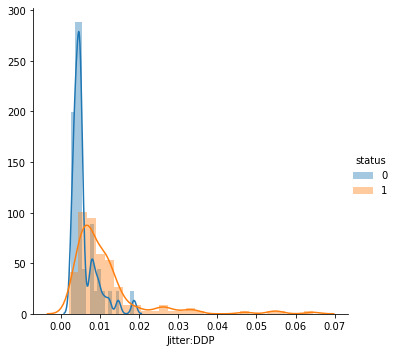

In [91]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'Jitter:DDP').add_legend() # more  persons with disease has higher Jitter:DDP

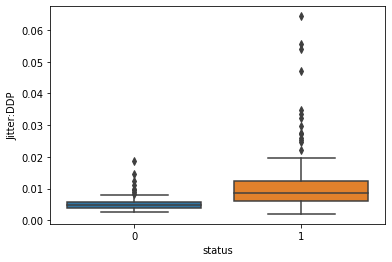

In [92]:
sns.boxplot(x='status',y='Jitter:DDP',data=df1) # People with lower Jitter:DDP are healthy and with hiher  have disease

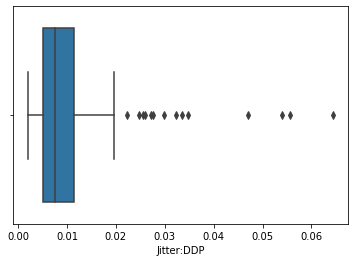

In [88]:
sns.boxplot('Jitter:DDP',data=df1) # has outliers,max distribution between 0.001660 to 0.003835, meadian 0.002500,right skewed

In [87]:
df1['Jitter:DDP'].describe() # mean is more than median so its right skewed

count    195.000000
mean       0.009920
std        0.008903
min        0.002040
25%        0.004985
50%        0.007490
75%        0.011505
max        0.064330
Name: Jitter:DDP, dtype: float64

In [86]:
df1[['Jitter:DDP','status']].corr() # not highly correlated with status

,Jitter:DDP,status
Jitter:DDP,1.000000,0.266646
status,0.266646,1.000000


C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


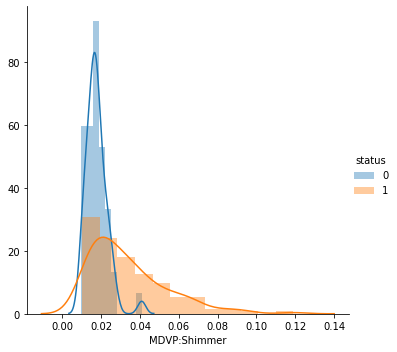

In [98]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'MDVP:Shimmer').add_legend() # more  persons with disease has higher MDVP:Shimmer

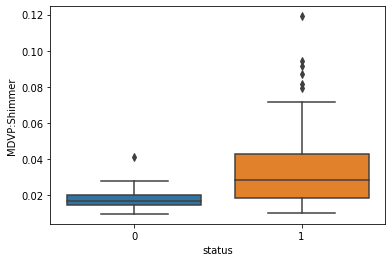

In [97]:
sns.boxplot(x='status',y='MDVP:Shimmer',data=df1) # People with lower MDVP:Shimmer are healthy and with hiher  have disease

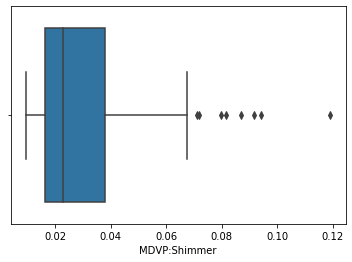

In [96]:
sns.boxplot('MDVP:Shimmer',data=df1) # has outliers,max distribution between 0.001660 to 0.037885, meadian 0.022970,right skewed

In [94]:
df1['MDVP:Shimmer'].describe() # mean is more than median so its right skewed

count    195.000000
mean       0.029709
std        0.018857
min        0.009540
25%        0.016505
50%        0.022970
75%        0.037885
max        0.119080
Name: MDVP:Shimmer, dtype: float64

In [93]:
df1[['MDVP:Shimmer','status']].corr() # not highly correlated with status

,MDVP:Shimmer,status
MDVP:Shimmer,1.00000,0.36743
status,0.36743,1.00000


C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


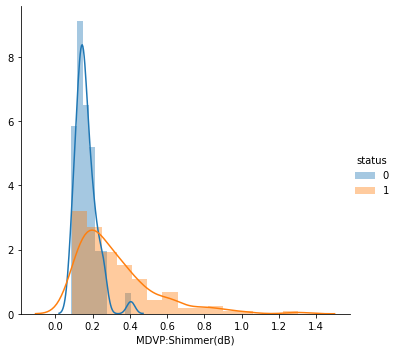

In [103]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'MDVP:Shimmer(dB)').add_legend() # more  persons with disease has higher MDVP:Shimmer(dB)

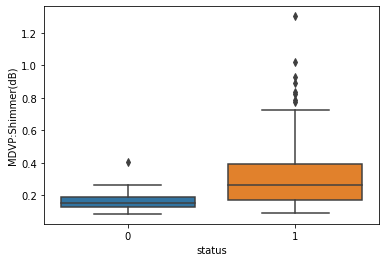

In [102]:
sns.boxplot(x='status',y='MDVP:Shimmer(dB)',data=df1) # People with lower MDVP:RAP are healthy and with hiher  have disease

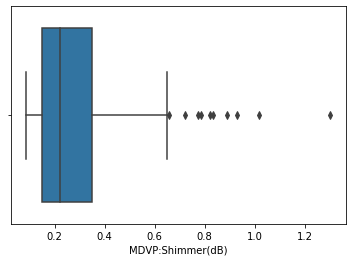

In [101]:
sns.boxplot('MDVP:Shimmer(dB)',data=df1) # has outliers,max distribution between 0.085000 to  0.350000, meadian 0.221000,right skewed

In [100]:
df1['MDVP:Shimmer(dB)'].describe() # mean is more than median so its right skewed

count    195.000000
mean       0.282251
std        0.194877
min        0.085000
25%        0.148500
50%        0.221000
75%        0.350000
max        1.302000
Name: MDVP:Shimmer(dB), dtype: float64

In [99]:
df1[['MDVP:Shimmer(dB)','status']].corr() # not highly correlated with status

,MDVP:Shimmer(dB),status
MDVP:Shimmer(dB),1.000000,0.350697
status,0.350697,1.000000


C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


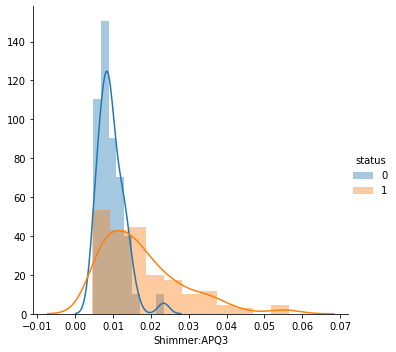

In [108]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'Shimmer:APQ3').add_legend() # more  persons with disease has higher Shimmer:APQ3

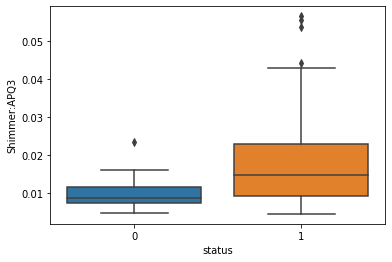

In [107]:
sns.boxplot(x='status',y='Shimmer:APQ3',data=df1) # People with lower Shimmer:APQ3 are healthy and with hiher  have disease

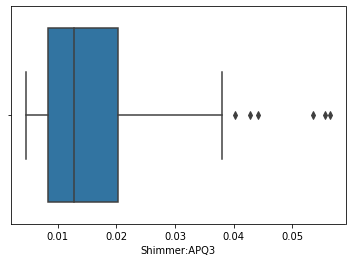

In [106]:
sns.boxplot('Shimmer:APQ3',data=df1) # has outliers,max distribution between 0.008245 to 0.020265, meadian 0.01279,right skewed

In [105]:
df1['Shimmer:APQ3'].describe() # mean is more than median so its right skewed

count    195.000000
mean       0.015664
std        0.010153
min        0.004550
25%        0.008245
50%        0.012790
75%        0.020265
max        0.056470
Name: Shimmer:APQ3, dtype: float64

In [104]:
df1[['Shimmer:APQ3','status']].corr() # not highly correlated with status

,Shimmer:APQ3,status
Shimmer:APQ3,1.000000,0.347617
status,0.347617,1.000000


C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


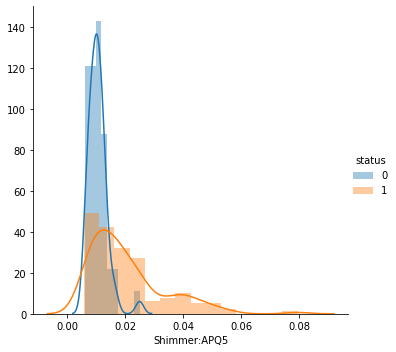

In [113]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'Shimmer:APQ5').add_legend() # more  persons with disease has higher Shimmer:APQ5

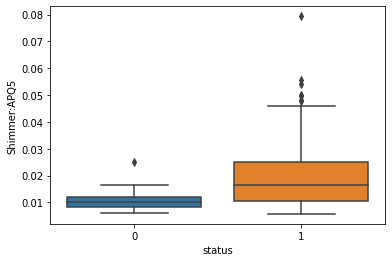

In [112]:
sns.boxplot(x='status',y='Shimmer:APQ5',data=df1) # People with lower Shimmer:APQ5 are healthy and with hiher  have disease

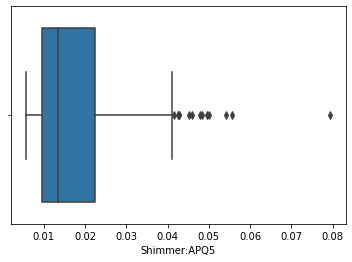

In [111]:
sns.boxplot('Shimmer:APQ5',data=df1) # has outliers,max distribution between 0.009580 to 0.022380, meadian 0.013470,right skewed

In [110]:
df1['Shimmer:APQ5'].describe() # mean is more than median so its right skewed

count    195.000000
mean       0.017878
std        0.012024
min        0.005700
25%        0.009580
50%        0.013470
75%        0.022380
max        0.079400
Name: Shimmer:APQ5, dtype: float64

In [109]:
df1[['Shimmer:APQ5','status']].corr() # not highly correlated with status

,Shimmer:APQ5,status
Shimmer:APQ5,1.000000,0.351148
status,0.351148,1.000000


C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


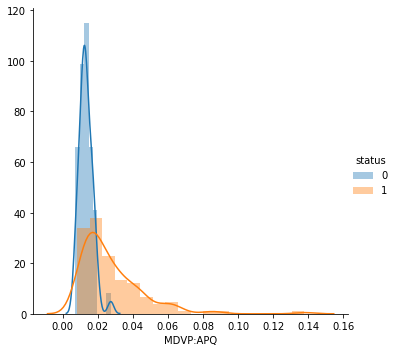

In [121]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'MDVP:APQ').add_legend() # more  persons with disease has higher MDVP:APQ

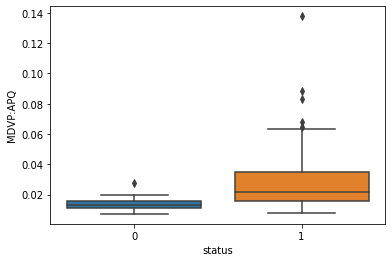

In [120]:
sns.boxplot(x='status',y='MDVP:APQ',data=df1) # People with lower MDVP:APQ are healthy and with hiher  have disease

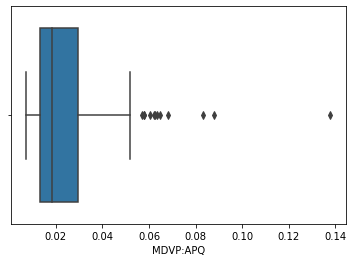

In [119]:
sns.boxplot('MDVP:APQ',data=df1) # has outliers,max distribution between 0.013080 to 0.029400, meadian 0.018260,right skewed

In [117]:
df1['MDVP:APQ'].describe() # mean is more than median so its right skewed

count    195.000000
mean       0.024081
std        0.016947
min        0.007190
25%        0.013080
50%        0.018260
75%        0.029400
max        0.137780
Name: MDVP:APQ, dtype: float64

In [118]:
df1[['MDVP:APQ','status']].corr() # not highly correlated with status

,MDVP:APQ,status
MDVP:APQ,1.000000,0.364316
status,0.364316,1.000000


C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


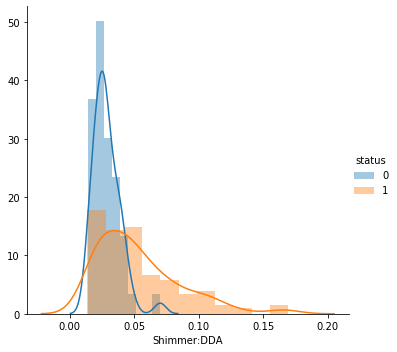

In [126]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'Shimmer:DDA').add_legend() # more  persons with disease has higher Shimmer:DDA

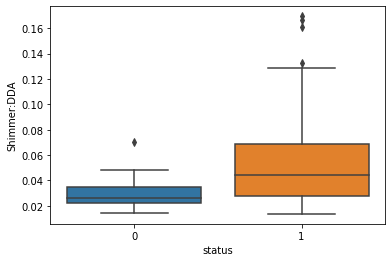

In [125]:
sns.boxplot(x='status',y='Shimmer:DDA',data=df1) # People with lower Shimmer:DDA are healthy and with hiher  have disease

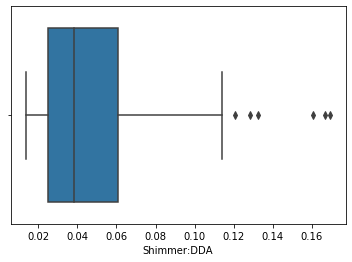

In [124]:
sns.boxplot('Shimmer:DDA',data=df1) # has outliers,max distribution between 0.024735 to 0.060795, meadian 0.038360,right skewed

In [123]:
df1['Shimmer:DDA'].describe() # mean is more than median so its right skewed

count    195.000000
mean       0.046993
std        0.030459
min        0.013640
25%        0.024735
50%        0.038360
75%        0.060795
max        0.169420
Name: Shimmer:DDA, dtype: float64

In [122]:
df1[['Shimmer:DDA','status']].corr() # not highly correlated with status

,Shimmer:DDA,status
Shimmer:DDA,1.000000,0.347608
status,0.347608,1.000000


C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


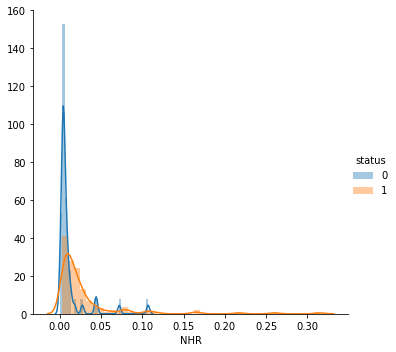

In [132]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'NHR').add_legend() # more  persons with disease has higher NHR

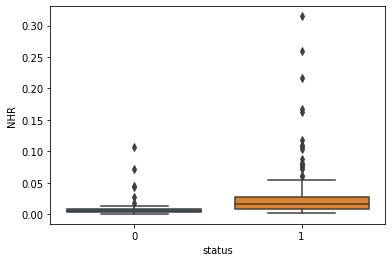

In [131]:
sns.boxplot(x='status',y='NHR',data=df1) # People with lower NHR are healthy and with hiher  have disease

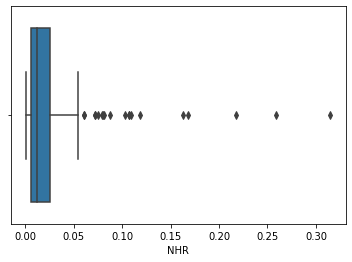

In [130]:
sns.boxplot('NHR',data=df1) # has outliers,max distribution between 0.005925 to 0.025640, meadian 0.011660,right skewed

In [129]:
df1['NHR'].describe() # mean is more than median so its right skewed

count    195.000000
mean       0.024847
std        0.040418
min        0.000650
25%        0.005925
50%        0.011660
75%        0.025640
max        0.314820
Name: NHR, dtype: float64

In [128]:
df1[['NHR','status']].corr() # not highly correlated with status

,NHR,status
NHR,1.000000,0.189429
status,0.189429,1.000000


C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


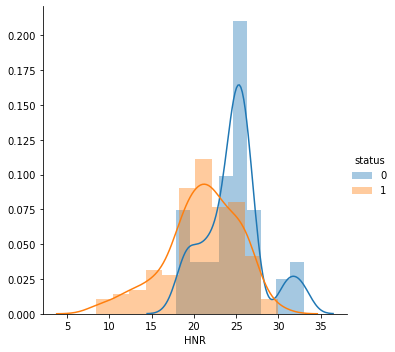

In [136]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'HNR').add_legend() # more  persons with disease has lower HNR

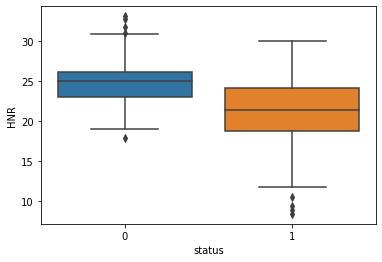

In [135]:
sns.boxplot(x='status',y='HNR',data=df1) # People with higher HNR are healthy and with lower  have disease

In [ ]:
sns.boxplot('HNR',data=df1) # has outliers,max distribution between 19.198000 to 25.075500, meadian 22.085000,right skewed

In [134]:
df1['HNR'].describe() # mean is less than median so its left skewed

count    195.000000
mean      21.885974
std        4.425764
min        8.441000
25%       19.198000
50%       22.085000
75%       25.075500
max       33.047000
Name: HNR, dtype: float64

In [133]:
df1[['HNR','status']].corr() # not highly correlated with status

,HNR,status
HNR,1.000000,-0.361515
status,-0.361515,1.000000


C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


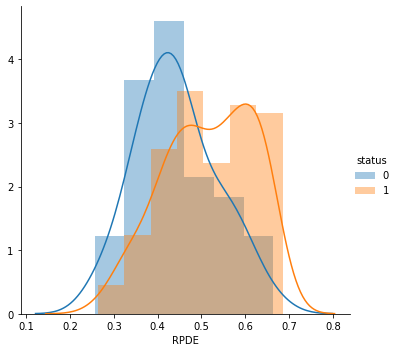

In [143]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'RPDE').add_legend() # more  persons with disease has higher RPDE

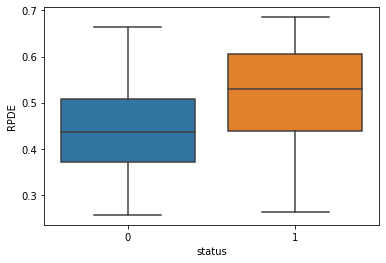

In [142]:
sns.boxplot(x='status',y='RPDE',data=df1) # People with lower RPDE are healthy and with hiher  have disease

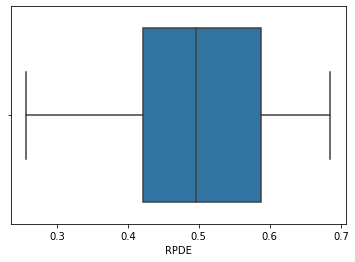

In [141]:
sns.boxplot('RPDE',data=df1) # has no outliers,max distribution between 0.421306 to 0.587562, meadian 0.495954,right skewed

In [140]:
df1['RPDE'].describe() # mean and meadian are almost same so no skewness

count    195.000000
mean       0.498536
std        0.103942
min        0.256570
25%        0.421306
50%        0.495954
75%        0.587562
max        0.685151
Name: RPDE, dtype: float64

In [139]:
df1[['RPDE','status']].corr() # not highly correlated with status

,RPDE,status
RPDE,1.000000,0.308567
status,0.308567,1.000000


C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


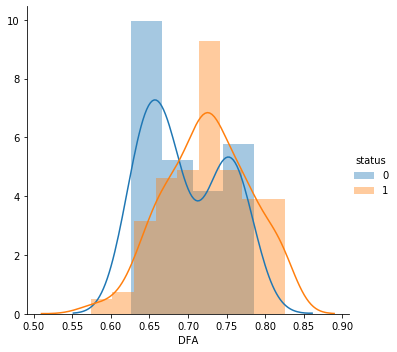

In [148]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'DFA').add_legend() # more  persons with disease has higher DFA

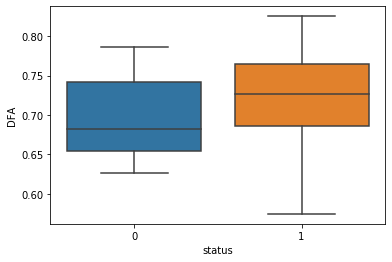

In [147]:
sns.boxplot(x='status',y='DFA',data=df1) # People with lower DFA are healthy and with hiher  have disease

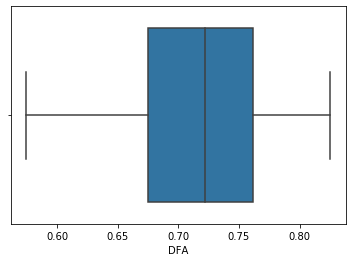

In [146]:
sns.boxplot('DFA',data=df1) # has no outliers,max distribution between 0.674758 to 0.761881, meadian 0.722254,left skewed

In [145]:
df1['DFA'].describe() # mean is slightly less than median so its liitle left skewed

count    195.000000
mean       0.718099
std        0.055336
min        0.574282
25%        0.674758
50%        0.722254
75%        0.761881
max        0.825288
Name: DFA, dtype: float64

In [144]:
df1[['DFA','status']].corr() # not highly correlated with status

,DFA,status
DFA,1.000000,0.231739
status,0.231739,1.000000


C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


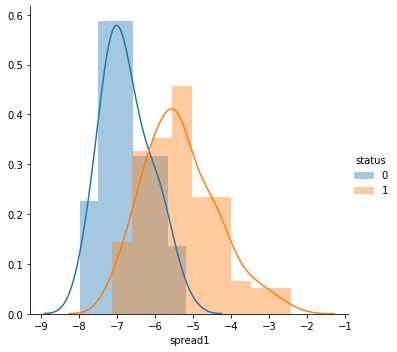

In [153]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'spread1').add_legend() # more  persons with disease has higher spread1

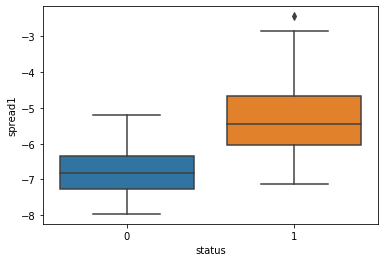

In [152]:
sns.boxplot(x='status',y='spread1',data=df1) # People with lower spread1 are healthy and with hiher  have disease

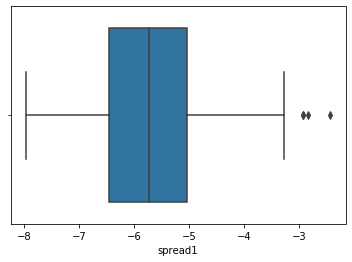

In [151]:
sns.boxplot('spread1',data=df1) # has outliers,max distribution between -6.450096 to -5.046192, meadian -5.720868,left skewed

In [150]:
df1['spread1'].describe() # mean is less than median so its slightly left skewed

count    195.000000
mean      -5.684397
std        1.090208
min       -7.964984
25%       -6.450096
50%       -5.720868
75%       -5.046192
max       -2.434031
Name: spread1, dtype: float64

In [149]:
df1[['spread1','status']].corr() # its correlated with status

,spread1,status
spread1,1.000000,0.564838
status,0.564838,1.000000


C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


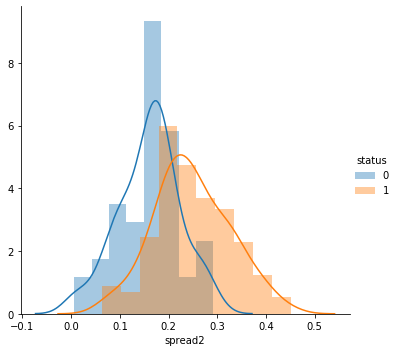

In [158]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'spread2').add_legend() # more  persons with disease has higher spread2

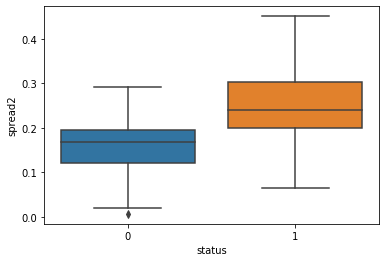

In [157]:
sns.boxplot(x='status',y='spread2',data=df1) # People with lower spread2 are healthy and with hiher  have disease

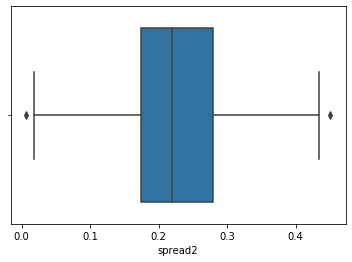

In [156]:
sns.boxplot('spread2',data=df1) # has outliers,max distribution between 0.174351 to 0.279234, meadian 0.218885,right skewed

In [155]:
df1['spread2'].describe() # mean is more than median so its right skewed

count    195.000000
mean       0.226510
std        0.083406
min        0.006274
25%        0.174351
50%        0.218885
75%        0.279234
max        0.450493
Name: spread2, dtype: float64

In [154]:
df1[['spread2','status']].corr() # relatively correlated with status

,spread2,status
spread2,1.000000,0.454842
status,0.454842,1.000000


C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


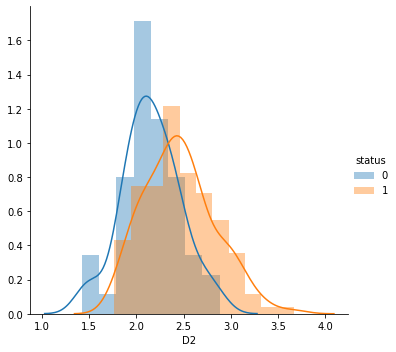

In [163]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'D2').add_legend() # more  persons with disease has higher D2

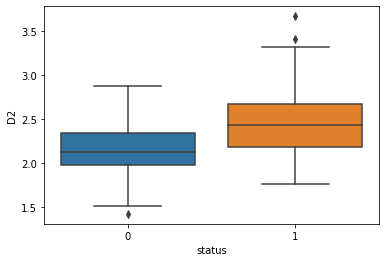

In [162]:
sns.boxplot(x='status',y='D2',data=df1) # People with lower D2 are healthy and with hiher  have disease

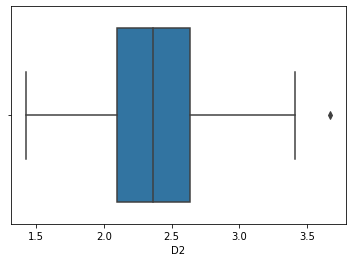

In [161]:
sns.boxplot('D2',data=df1) # has outliers,max distribution between 2.099125 to 2.636456, meadian 2.361532,right skewed

In [160]:
df1['D2'].describe() # mean is more than median so its right skewed

count    195.000000
mean       2.381826
std        0.382799
min        1.423287
25%        2.099125
50%        2.361532
75%        2.636456
max        3.671155
Name: D2, dtype: float64

In [159]:
df1[['D2','status']].corr() # not highly correlated with status

,D2,status
D2,1.000000,0.340232
status,0.340232,1.000000


C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


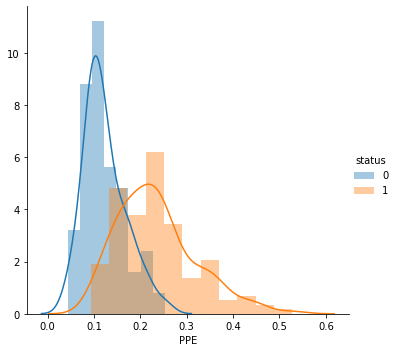

In [169]:
sns.FacetGrid(df1,hue='status',size=5) .map(sns.distplot,'PPE').add_legend() # more  persons with disease has higher PPE

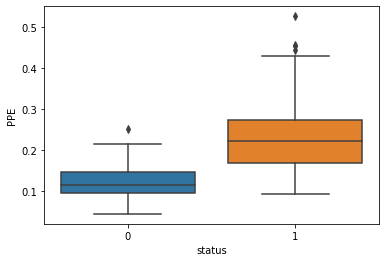

In [167]:
sns.boxplot(x='status',y='PPE',data=df1) # People with lower PPE are healthy and with hiher  have disease

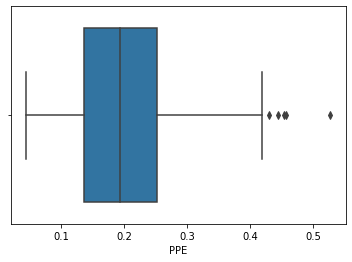

In [168]:
sns.boxplot('PPE',data=df1) # has outliers,max distribution between 0.137451 to 0.252980, meadian 0.194052,right skewed

In [165]:
df1['PPE'].describe() # mean is more than median so its right skewed

count    195.000000
mean       0.206552
std        0.090119
min        0.044539
25%        0.137451
50%        0.194052
75%        0.252980
max        0.527367
Name: PPE, dtype: float64

In [164]:
df1[['PPE','status']].corr() # relatively highly correlated with status

,PPE,status
PPE,1.000000,0.531039
status,0.531039,1.000000


# 4. Split the data set into training and test set in the ratio of 70:30 (Training:Test)

In [177]:
X=df1.drop(['status','name'],axis=1) # Features are assigned to X

y=df1['status'] #target is assigned to y

In [178]:
print(X.shape)
print(y.shape)

(195, 22)
(195,)


In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

# 5.Create the model using “entropy” method of reducing the entropy and fit it to training data

In [206]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state=10)

In [208]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# 6.Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a cross-tab.

In [209]:
print("Test Score :",dt_model.score(X_test,y_test)) # Test Score

Test Score : 0.847457627118644


In [210]:
print("Training Score :",dt_model.score(X_train,y_train)) # Training score

Training Score : 1.0


In [211]:
from sklearn import metrics
y_predict=dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict)) # confusion matrix

[[11  8]
 [ 1 39]]


In [212]:
pd.crosstab(y_test, y_predict,margins=True)

col_0,0,1,All
status,,,
0,11,8,19
1,1,39,40
All,12,47,59


In [213]:
print("Test F1:Score: ", metrics.f1_score(y_test, y_predict))  # Test F1 score

Test F1:Score:  0.896551724137931


In [189]:
print(metrics.classification_report(y_test, y_predict)) # Test Classification

              precision    recall  f1-score   support

           0       0.70      0.44      0.54        16
           1       0.82      0.93      0.87        43

    accuracy                           0.80        59
   macro avg       0.76      0.68      0.70        59
weighted avg       0.78      0.80      0.78        59



# 7.Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?

# Accuracy Score for max_depths =  3 is 0.9152542372881356

In [279]:
from sklearn.metrics import accuracy_score
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for max_depth in max_depths:
    dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=max_depth,random_state=10 )
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    accuracy  = accuracy_score(y_test,y_pred)
    print("Accuracy Score for max_depths = ",max_depth, accuracy)


Accuracy Score for max_depths =  1 0.8135593220338984
Accuracy Score for max_depths =  2 0.7966101694915254
Accuracy Score for max_depths =  3 0.9152542372881356
Accuracy Score for max_depths =  4 0.8983050847457628
Accuracy Score for max_depths =  5 0.8983050847457628
Accuracy Score for max_depths =  6 0.8983050847457628
Accuracy Score for max_depths =  7 0.8983050847457628
Accuracy Score for max_depths =  8 0.8983050847457628
Accuracy Score for max_depths =  9 0.8983050847457628
Accuracy Score for max_depths =  10 0.8983050847457628
Accuracy Score for max_depths =  11 0.8983050847457628
Accuracy Score for max_depths =  12 0.8983050847457628
Accuracy Score for max_depths =  13 0.8983050847457628
Accuracy Score for max_depths =  14 0.8983050847457628
Accuracy Score for max_depths =  15 0.8983050847457628


In [ ]:
# Accuracy Score for max_depths =  3 is 0.9152542372881356

# Accuracy Score for min_sample_leafs =  5 is  0.9152542372881356

In [282]:
from sklearn.metrics import accuracy_score
min_sample_leafs = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,150,200]

for min_sample_leaf in min_sample_leafs:
    dt_model = DecisionTreeClassifier(criterion = 'entropy',min_samples_leaf=min_sample_leaf,random_state=10 )
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    accuracy  = accuracy_score(y_test,y_pred)
    print("Accuracy Score for min_sample_leafs = ",min_sample_leaf, accuracy)

Accuracy Score for min_sample_leafs =  5 0.9152542372881356
Accuracy Score for min_sample_leafs =  10 0.847457627118644
Accuracy Score for min_sample_leafs =  15 0.7966101694915254
Accuracy Score for min_sample_leafs =  20 0.8135593220338984
Accuracy Score for min_sample_leafs =  25 0.8135593220338984
Accuracy Score for min_sample_leafs =  30 0.8135593220338984
Accuracy Score for min_sample_leafs =  35 0.6779661016949152
Accuracy Score for min_sample_leafs =  40 0.6779661016949152
Accuracy Score for min_sample_leafs =  45 0.6779661016949152
Accuracy Score for min_sample_leafs =  50 0.6779661016949152
Accuracy Score for min_sample_leafs =  55 0.6779661016949152
Accuracy Score for min_sample_leafs =  60 0.6779661016949152
Accuracy Score for min_sample_leafs =  65 0.6779661016949152
Accuracy Score for min_sample_leafs =  70 0.6779661016949152
Accuracy Score for min_sample_leafs =  75 0.6779661016949152
Accuracy Score for min_sample_leafs =  80 0.6779661016949152
Accuracy Score for min_sam

# Regulaization helps with overfiting , imporve performance and provides best results.

In [284]:
# With optimised depth and samples leaf
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,min_samples_leaf=5,random_state=10 )

In [285]:
dt_model.fit(X_train, y_train) # model fiting 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [286]:
print("Test Score :",dt_model.score(X_test,y_test)) # Test Score

Test Score : 0.9152542372881356


In [287]:
print("Training Score :",dt_model.score(X_train,y_train)) # Training score

Training Score : 0.9705882352941176


In [288]:
y_predict=dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[15  4]
 [ 1 39]]


In [289]:
print("Test F1:Score: ", metrics.f1_score(y_test, y_predict))  # Test F1 score

Test F1:Score:  0.9397590361445783


# 8.Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? 

# Random forest model with randon estimator 99

In [261]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 99,random_state=10)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=99,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [269]:
print("Test Score :",rf.score(X_test,y_test)) # Test Score

Test Score : 0.847457627118644


In [263]:
print("Training Score :",rf.score(X_train,y_train)) # Training score

Training Score : 1.0


In [267]:
y_predict=rf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict)) # confusion matrix

[[11  8]
 [ 1 39]]


In [268]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.58      0.71        19
           1       0.83      0.97      0.90        40

    accuracy                           0.85        59
   macro avg       0.87      0.78      0.80        59
weighted avg       0.86      0.85      0.84        59



# What is the optimal number of trees that gives the best result?
# Accuracy Score for n_estimators =  22 is 0.8983050847457628

In [272]:
estimators = np.arange(1,200) # range till 200
accuracy_plot = np.empty(len(estimators))
# Loop over different values of k
for estimator in (estimators):
    rf = RandomForestClassifier(n_estimators=estimator,random_state=10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy_plot[estimator] = accuracy_score(y_test,y_pred)
    print("Accuracy Score for n_estimators = ",estimator, accuracy_plot[estimator])

Accuracy Score for n_estimators =  1 0.7627118644067796
Accuracy Score for n_estimators =  2 0.7796610169491526
Accuracy Score for n_estimators =  3 0.8305084745762712
Accuracy Score for n_estimators =  4 0.8135593220338984
Accuracy Score for n_estimators =  5 0.8135593220338984
Accuracy Score for n_estimators =  6 0.864406779661017
Accuracy Score for n_estimators =  7 0.864406779661017
Accuracy Score for n_estimators =  8 0.847457627118644
Accuracy Score for n_estimators =  9 0.847457627118644
Accuracy Score for n_estimators =  10 0.864406779661017
Accuracy Score for n_estimators =  11 0.8305084745762712
Accuracy Score for n_estimators =  12 0.864406779661017
Accuracy Score for n_estimators =  13 0.864406779661017
Accuracy Score for n_estimators =  14 0.8813559322033898
Accuracy Score for n_estimators =  15 0.847457627118644
Accuracy Score for n_estimators =  16 0.864406779661017
Accuracy Score for n_estimators =  17 0.847457627118644
Accuracy Score for n_estimators =  18 0.8644067796

Accuracy Score for n_estimators =  146 0.8305084745762712
Accuracy Score for n_estimators =  147 0.8305084745762712
Accuracy Score for n_estimators =  148 0.8305084745762712
Accuracy Score for n_estimators =  149 0.8305084745762712
Accuracy Score for n_estimators =  150 0.8305084745762712
Accuracy Score for n_estimators =  151 0.8305084745762712
Accuracy Score for n_estimators =  152 0.8305084745762712
Accuracy Score for n_estimators =  153 0.8305084745762712
Accuracy Score for n_estimators =  154 0.8305084745762712
Accuracy Score for n_estimators =  155 0.8305084745762712
Accuracy Score for n_estimators =  156 0.8305084745762712
Accuracy Score for n_estimators =  157 0.8305084745762712
Accuracy Score for n_estimators =  158 0.8305084745762712
Accuracy Score for n_estimators =  159 0.8305084745762712
Accuracy Score for n_estimators =  160 0.8305084745762712
Accuracy Score for n_estimators =  161 0.8305084745762712
Accuracy Score for n_estimators =  162 0.8305084745762712
Accuracy Score

IndexError: index 199 is out of bounds for axis 0 with size 199

In [271]:
accuracy_plot.max()
print('Optimam found at estimator = ',estimators[np.where(accuracy_plot == np.amax(accuracy_plot))])

Optimam found at estimator =  [23 25]
